### PH464/564: Scientific Computing II
***J.S. Hazboun***

___

# Homework 1
### Due: Friday, Oct 3rd at 11:59pm Pacific
---

## Handing in Homework

You had the opportunity to practice your git and GitHub skills by submitting HW0 via GitHub. You will need to repeat the process for every homework assigment going forward. Please make sure a copy of the completed assignment is placed in your repos "my_work" directory and pushed to GitHub. Please label files _starting_ with the appropriate hw number. This week's will be `hw1_YOUR_NAME.ipynb`. In addition, I want another document which only has the answers to the questions asked in this HW assignment, along with any figures that you deem appropriate to make yourself understood. Please restate the question where appropriate. Code files will be checked for completeness **only**. I will only consider the answers in the separate `pdf` for grading your understanding of the questions.

**WARNING for devcontainer users:** If you are using the **devcontainer** via `VSCode`, then you will want to make a separate working folder directly in your fork of the class repo and work on your assignment by either _copying_ a notebook in there or opening a new one in that folder. The reason is that the _repo_ has the devcontainer instructions and when you open `VSCode` it recognizes this and starts up the devcontainer.  

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Problem 1



Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1) *(To get you started)* If the first child is male, then the only unknown is the sex of the second child. We want the second child to be female, which has a probability of 0.5. Thus, $p(F,M |C_1=M) = 0.5$. 

2) Considering the four options MM, MF, FM, FF, if it's given that one child is female, than that elimitates MM leaving the other three. The chances of both children being female is 1/3 then, since there are two possible ways to have one female and one male child, but only one possiblity to have two female children.

3) Just like in the first problem, we're specifying which child has the given gender, so the probability of the other child being male or female is still 0.5.

## Problem 2

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the base-10 log of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `Lecture_2`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.

### Solution

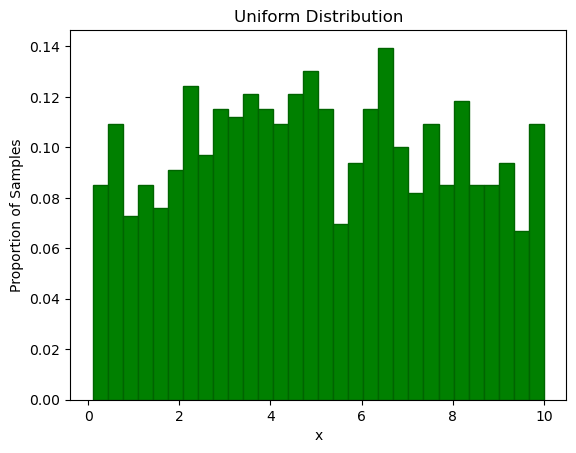

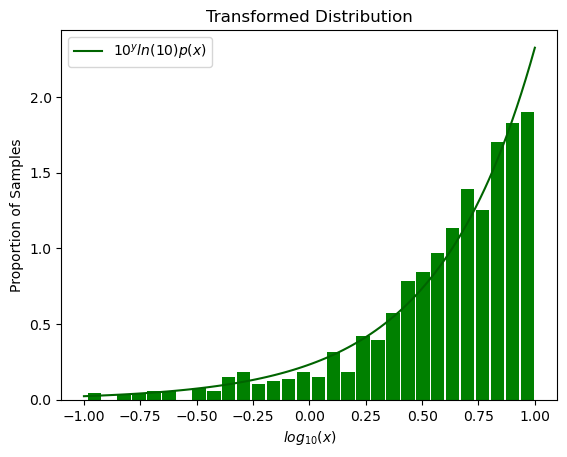

x mean 5.035114215604846
x median 4.910781309550187
y mean 0.5951766852450676
y median 0.6911505915253511


In [40]:
x=np.random.uniform(low=0.1,high=10,size=1000)
plt.hist(x, bins=30, color="green", edgecolor="darkgreen", density=True)
plt.ylabel("Proportion of Samples")
plt.xlabel("x")
plt.title("Uniform Distribution")
plt.show()
y=np.log10(x)
y2=np.linspace(-1, 1, 100)
p_x=1/9.9
p_y=10**y2*np.log(10)*p_x
plt.hist(y, bins=30, color="green",rwidth=.9, density=True)
plt.plot(y2,p_y,color="darkgreen",label="$10^yln(10)p(x)$")
plt.ylabel("Proportion of Samples")
plt.xlabel("$log_{10}(x)$")
plt.title("Transformed Distribution")
plt.legend()
plt.show()
print("x mean", np.mean(x))
print("x median", np.median(x))
print("y mean", np.mean(y))
print("y median", np.median(y))

## Problem 3

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. 

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian Python object from part (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

random draws: [ 81.04  94.38 131.02  84.84  81.28 117.1  112.72  92.83  78.92 117.11]
pdf at 145: 0.0002954565607958672


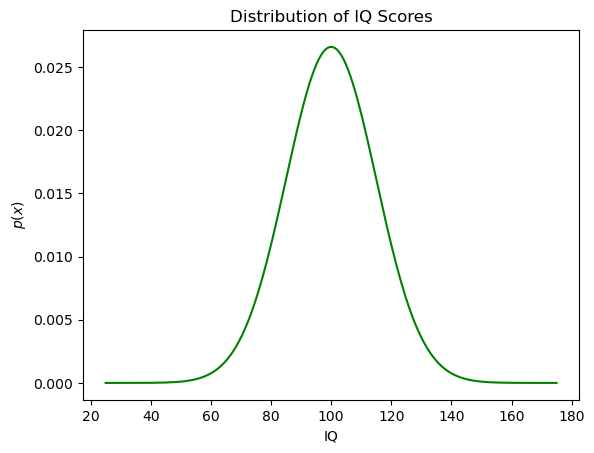

In [57]:
StDev=15
Mean=100
dist=sp.stats.norm(loc=Mean, scale=StDev)
x=np.linspace(Mean-5*StDev, Mean+5*StDev, 200)
y=sp.stats.norm.pdf(x, loc=Mean, scale=StDev)
plt.plot(x,y, color="green")
plt.title("Distribution of IQ Scores")
plt.ylabel("$p(x)$")
plt.xlabel("IQ")
r=sp.stats.norm.rvs(loc=Mean, scale=StDev, size=10)
print("random draws:",np.round(r,2))
print("pdf at 145:",sp.stats.norm.pdf(145, loc=Mean, scale=StDev))
#plt.hist(r)

cdf at 145: 0.9986501019683699
fraction of people over 145 IQ: 0.0013498980316301035
low end 1 in a million is 28.69863536765652
high end 1 in a million is 171.3013646322563


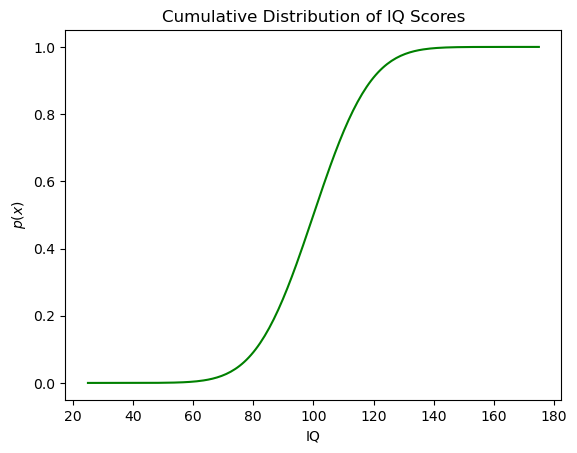

In [58]:
y=sp.stats.norm.cdf(x, loc=Mean, scale=StDev)
plt.plot(x,y,color="green")
plt.title("Cumulative Distribution of IQ Scores")
plt.ylabel("$p(x)$")
plt.xlabel("IQ")
a=sp.stats.norm.cdf(145, loc=Mean, scale=StDev)
print("cdf at 145:",a)
print("fraction of people over 145 IQ:", 1-a)
distG = sp.stats.norm(loc=100, scale=15)#I got this and the line below from Hannah
IQmillLow=distG.ppf(1/1e6)#using distG in place of sp.stats.norm was the only way to get it to stop throwing an error, idk why
IQmillHigh=distG.ppf(1-1/1e6)
print("low end 1 in a million is", IQmillLow)
print("high end 1 in a million is", IQmillHigh)